In [2]:
import numpy as np
import cv2
from matplotlib.pyplot import imshow

In [3]:
from keras.preprocessing.image import img_to_array
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

In [4]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = "true"

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 128, 128, 8)       2312      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 8)        

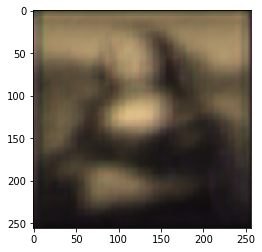

In [6]:
np.random.seed(42)

SIZE=256
img_data=[]

img=cv2.imread('./mon.jpg', 1)   #Change 1 to 0 for grey images
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Changing BGR to RGB to show images in true colors
img=cv2.resize(img,(SIZE, SIZE))
img_data.append(img_to_array(img))

img_array = np.reshape(img_data, (len(img_data), SIZE, SIZE, 3))
img_array = img_array.astype('float32') / 255.


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
     
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.summary()



model.fit(img_array, img_array,
        epochs=50,
        shuffle=True)


print("Neural network output")
pred = model.predict(img_array)



imshow(pred[0].reshape(SIZE,SIZE,3), cmap="gray")